In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel("cancer_data.xlsx")
df=pd.DataFrame(data)
data.sample(2)

Gender Smoker (Yes/No) Family History Hematuria (Yes / No)  \
426       M             NAN             No                  Yes   
1299      M             NAN             No                  Yes   

     Dysuria / Urgency Cystoscopy Urine cytology Tumour Grade (LG/HG)  \
426                 No   Positive       Negative           High Grade   
1299                No   Positive       Negative           High Grade   

     TNM Stage (T stage) Site of TCC / Mets  \
426                  Nil        Amyloidosis   
1299                 Nil        Amyloidosis   

     Primary Tumour Vs Recurrence Vs Mets    Expert  
426                                   NAN  Positive  
1299                           Recurrence  Positive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Gender                                1424 non-null   object
 1   Smoker (Yes/No)                       1424 non-null   object
 2   Family History                        1424 non-null   object
 3   Hematuria (Yes / No)                  1424 non-null   object
 4   Dysuria / Urgency                     1424 non-null   object
 5   Cystoscopy                            1424 non-null   object
 6   Urine cytology                        1424 non-null   object
 7   Tumour Grade (LG/HG)                  1424 non-null   object
 8   TNM Stage (T stage)                   1424 non-null   object
 9   Site of TCC / Mets                    1424 non-null   object
 10  Primary Tumour Vs Recurrence Vs Mets  1424 non-null   object
 11  Expert                        

### Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['M' 'F']
Gender
M    1107
F     317
Name: count, dtype: int64


In [ ]:
df['GenderE'] = encoder.fit_transform(df['Gender'])

In [ ]:
print(df['Smoker (Yes/No)'].unique())
df['Smoker (Yes/No)'].replace('NAN', 'Unknown', inplace=True)
print(df['Smoker (Yes/No)'].value_counts())

['Yes' 'No' 'Unknown' 'NAN']
Smoker (Yes/No)
Unknown    940
No         384
Yes        100
Name: count, dtype: int64


In [ ]:
print(df['Smoker (Yes/No)'].unique())

['Yes' 'No' 'Unknown']


In [ ]:
df['Smoker'] = encoder.fit_transform(df['Smoker (Yes/No)'])

In [ ]:
print(df['Family History'].unique())
print(df['Family History'].value_counts())

['No' 'Yes']
Family History
No     1038
Yes     386
Name: count, dtype: int64


In [ ]:
df['FamilyHistory'] = encoder.fit_transform(df['Family History'])

In [ ]:
print(df['Hematuria (Yes / No)'].unique())
print(df['Hematuria (Yes / No)'].value_counts())

['Yes' 'No']
Hematuria (Yes / No)
Yes    1078
No      346
Name: count, dtype: int64


In [ ]:
df['Hematuria'] = encoder.fit_transform(df['Hematuria (Yes / No)'])

In [ ]:
print(df['Dysuria / Urgency'].unique())
print(f"NAN",df['Dysuria / Urgency'].isnull().sum())
df['Dysuria / Urgency'].replace('NAN', 'Unknown', inplace=True)
print(df['Dysuria / Urgency'].value_counts())

['No' 'Yes' 'Unknown' 'NAN']
NAN 0
Dysuria / Urgency
Unknown    723
No         566
Yes        135
Name: count, dtype: int64


In [ ]:
df['Dysuria'] = encoder.fit_transform(df['Dysuria / Urgency'])

In [ ]:
print(df['Tumour Grade (LG/HG)'].unique())
print(f"NAN",df['Tumour Grade (LG/HG)'].isnull().sum())
df['Tumour Grade (LG/HG)'].replace('NAN', 'Unknown', inplace=True)
print(df['Tumour Grade (LG/HG)'].value_counts())

['High Grade' 'Low Grade' 'Unknown' 'NAN']
NAN 0
Tumour Grade (LG/HG)
Unknown       680
High Grade    626
Low Grade     118
Name: count, dtype: int64


In [ ]:
df['TumourGrade'] = encoder.fit_transform(df['Tumour Grade (LG/HG)'])

In [ ]:
print(df['TNM Stage (T stage)'].unique())
print(df['TNM Stage (T stage)'].value_counts())

['pT1' 'pTa' 'pT2' 'pT3' 'Nil']
TNM Stage (T stage)
Nil    1311
pT1      64
pTa      29
pT2      19
pT3       1
Name: count, dtype: int64


In [ ]:
df['TNMStage'] = encoder.fit_transform(df['TNM Stage (T stage)'])
df.loc[df['TNMStage'] != 'Nil', 'TNMStage'] += 1

In [ ]:
print(df['Site of TCC / Mets'].unique())
print(df['Site of TCC / Mets'].value_counts())

['Bladder' 'adenocarcinoma' 'IMFT' 'Amyloidosis' 'Mets' 'Ureteric stone'
 'Stone disease' 'Renal Pelvis ' 'Pelvicalayceal system' 'Paraganglioma  '
 'kidney cysts/ Bladder cyst' 'Bladder growth' 'Adenocarcinoma Bladder'
 'infections' 'Cystitis' 'Ureteric Stone' 'Stone Disease'
 'Pelvicalayceal System' 'Infections' 'Adenocarcinoma' 'Bladder Growth'
 'Kidney Cysts/Bladder Cyst' 'Renal Pelvis' 'Paraganglioma']
Site of TCC / Mets
Amyloidosis                   395
Bladder                       185
Adenocarcinoma Bladder        165
infections                    147
Stone disease                 142
Cystitis                       90
Kidney Cysts/Bladder Cyst      57
Bladder Growth                 54
IMFT                           29
Mets                           28
Infections                     21
Stone Disease                  20
Ureteric Stone                 19
Adenocarcinoma                 18
Renal Pelvis                   16
Pelvicalayceal System          14
Paraganglioma             

In [ ]:
df['TCC/Mets'] = encoder.fit_transform(df['Site of TCC / Mets'])

In [ ]:
print(df['Primary Tumour Vs Recurrence Vs Mets'].unique())
print(f"NAN",df['Primary Tumour Vs Recurrence Vs Mets'].isnull().sum())
df['Primary Tumour Vs Recurrence Vs Mets'].replace('NAN', 'Unknown', inplace=True)
print(df['Primary Tumour Vs Recurrence Vs Mets'].value_counts())

['Primary' 'Recurrence' 'Mets' 'Unknown' 'NAN']
NAN 0
Primary Tumour Vs Recurrence Vs Mets
Unknown       624
Recurrence    477
Mets          180
Primary       143
Name: count, dtype: int64


In [ ]:
df['PvRvM'] = encoder.fit_transform(df['Primary Tumour Vs Recurrence Vs Mets'])

In [ ]:
print(df['Cystoscopy'].unique())
print(df['Cystoscopy'].value_counts())

['Positive' 'Negative']
Cystoscopy
Positive    822
Negative    602
Name: count, dtype: int64


In [ ]:
df['Cystoscopy'] = encoder.fit_transform(df['Cystoscopy'])

In [ ]:
print(df['Urine cytology'].unique())
print(df['Urine cytology'].value_counts())

['Positive' 'Negative']
Urine cytology
Negative    1336
Positive      88
Name: count, dtype: int64


In [ ]:
df['UrineCytology'] = encoder.fit_transform(df['Urine cytology'])

In [ ]:
df['Expert'].replace({'Negative ':'Negative'}, inplace=True)
print(df['Expert'].unique())
print(df['Expert'].value_counts())

['Positive' 'Negative']
Expert
Positive    771
Negative    653
Name: count, dtype: int64


In [ ]:
df['GeneExpert'] = encoder.fit_transform(df['Expert'])

In [ ]:
df.sample(5)

Gender Smoker (Yes/No) Family History Hematuria (Yes / No)  \
141       F         Unknown            Yes                  Yes   
371       M         Unknown             No                   No   
1108      M         Unknown             No                  Yes   
434       M              No            Yes                   No   
356       M         Unknown             No                  Yes   

     Dysuria / Urgency  Cystoscopy Urine cytology Tumour Grade (LG/HG)  \
141            Unknown           0       Negative              Unknown   
371            Unknown           0       Negative              Unknown   
1108                No           1       Negative           High Grade   
434            Unknown           0       Negative              Unknown   
356            Unknown           0       Negative              Unknown   

     TNM Stage (T stage) Site of TCC / Mets  ... Smoker FamilyHistory  \
141                  Nil         infections  ...      1             1   
371                  Nil      Stone disease  ...      1             0   
1108                 Nil        Amyloidosis  ...      1             0   
434                  Nil     Adenocarcinoma  ...      0             1   
356                  Nil      Stone disease  ...      1             0   

      Hematuria  Dysuria  TumourGrade  TNMStage  TCC/Mets  PvRvM  \
141           1        1            2         1        22      3   
371           0        1            2         1        18      3   
1108          1        0            0         1         2      2   
434           0        1            2         1         0      2   
356           1        1            2         1        18      3   

      UrineCytology  GeneExpert  
141               0           0  
371               0           0  
1108              0           1  
434               0           0  
356               0           0  

[5 rows x 23 columns]

In [ ]:
df.drop('Gender', axis=1, inplace=True)
df.drop('Smoker (Yes/No)', axis=1, inplace=True)
df.drop('Family History', axis=1, inplace=True)
df.drop('Hematuria (Yes / No)', axis=1, inplace=True)
df.drop('Dysuria / Urgency', axis=1, inplace=True)
df.drop('Urine cytology', axis=1, inplace=True)
df.drop('Tumour Grade (LG/HG)', axis=1, inplace=True)
df.drop('TNM Stage (T stage)', axis=1, inplace=True)
df.drop('Site of TCC / Mets', axis=1, inplace=True)
df.drop('Primary Tumour Vs Recurrence Vs Mets', axis=1, inplace=True)
df.drop('Expert', axis=1, inplace=True)

### Split

In [ ]:
X = df.drop(['GeneExpert', 'UrineCytology', 'Cystoscopy'], axis=1)

target_expert = df['GeneExpert']
target_urine_cytology = df['UrineCytology']
target_cystoscopy = df['Cystoscopy']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X, target_expert)
Xt = lda.transform(X)

lda.fit(X, target_urine_cytology)
Xu = lda.transform(X)

lda.fit(X, target_cystoscopy)
Xc = lda.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_expert, X_test_expert, y_train_expert, y_test_expert = train_test_split(Xt, target_expert, test_size=0.4, random_state=42)
X_train_urine, X_test_urine, y_train_urine, y_test_urine = train_test_split(Xu, target_urine_cytology, test_size=0.4, random_state=42)
X_train_cystoscopy, X_test_cystoscopy, y_train_cystoscopy, y_test_cystoscopy = train_test_split(Xc, target_cystoscopy, test_size=0.4, random_state=42)

## **NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
NB.fit(X_train_expert, y_train_expert)

GaussianNB()

In [ ]:
y_pred_Expert = NB.predict(X_test_expert)

In [ ]:
conf_matrix_expert = confusion_matrix(y_test_expert, y_pred_Expert)
accuracy_expert = accuracy_score(y_test_expert, y_pred_Expert)
precision_expert = precision_score(y_test_expert, y_pred_Expert)
recall_expert = recall_score(y_test_expert, y_pred_Expert)
f1_expert = f1_score(y_test_expert, y_pred_Expert)

In [ ]:
print("Expert:")
print("Accuracy:", accuracy_expert )
print("Precision:", precision_expert)
print("Recall:", recall_expert)
print("F1 Score:", f1_expert)
print("\n")

Expert:
Accuracy: 0.9789473684210527
Precision: 0.9934426229508196
Recall: 0.9680511182108626
F1 Score: 0.9805825242718447




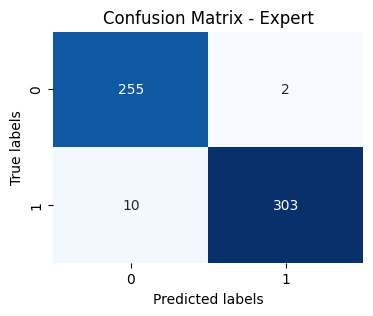

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_expert, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Expert')
plt.show()

In [ ]:
NB.fit(X_train_urine, y_train_urine)

GaussianNB()

In [ ]:
y_pred_Urine = NB.predict(X_test_urine)

In [ ]:
conf_matrix_urine = confusion_matrix(y_test_urine, y_pred_Urine)
accuracy_urine = accuracy_score(y_test_urine, y_pred_Urine)
precision_urine = precision_score(y_test_urine, y_pred_Urine)
recall_urine = recall_score(y_test_urine, y_pred_Urine)
f1_urine = f1_score(y_test_urine, y_pred_Urine)

In [ ]:
print("Urine Cytology:")
print("Accuracy:", accuracy_urine)
print("Precision:", precision_urine)
print("Recall:", recall_urine)
print("F1 Score:", f1_urine)
print("\n")

Urine Cytology:
Accuracy: 0.9578947368421052
Precision: 0.6
Recall: 0.42857142857142855
F1 Score: 0.5




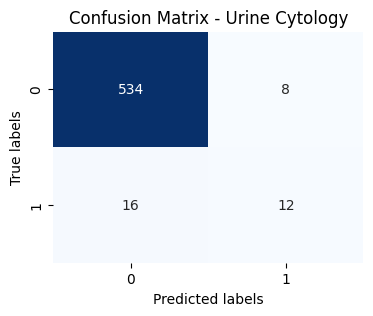

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_urine, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Urine Cytology')
plt.show()

In [ ]:
NB.fit(X_train_cystoscopy, y_train_cystoscopy)

GaussianNB()

In [ ]:
y_pred_Cystoscopy = NB.predict(X_test_cystoscopy)

In [ ]:
conf_matrix_cystoscopy = confusion_matrix(y_test_cystoscopy, y_pred_Cystoscopy)
accuracy_cystoscopy = accuracy_score(y_test_cystoscopy, y_pred_Cystoscopy)
precision_cystoscopy = precision_score(y_test_cystoscopy, y_pred_Cystoscopy)
recall_cystoscopy = recall_score(y_test_cystoscopy, y_pred_Cystoscopy)
f1_cystoscopy = f1_score(y_test_cystoscopy, y_pred_Cystoscopy)

In [ ]:
print("Cystoscopy:")
print("Accuracy:", accuracy_cystoscopy)
print("Precision:", precision_cystoscopy)
print("Recall:", recall_cystoscopy)
print("F1 Score:", f1_cystoscopy)

Cystoscopy:
Accuracy: 0.9526315789473684
Precision: 0.9487951807228916
Recall: 0.9692307692307692
F1 Score: 0.9589041095890412


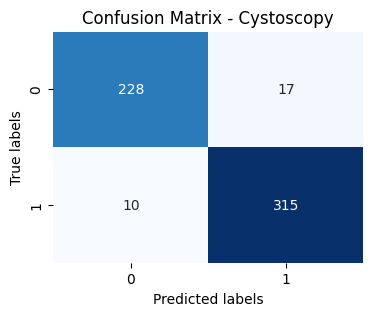

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_cystoscopy, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Cystoscopy')
plt.show()

## **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF1=RandomForestClassifier(n_estimators=100, random_state=42)
RF2=RandomForestClassifier(n_estimators=100, random_state=42)
RF3=RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
RF1.fit(X_train_expert, y_train_expert)

RandomForestClassifier(random_state=42)

In [ ]:
pred_expert = RF1.predict(X_test_expert)

In [ ]:
conf_matrix_expert1 = confusion_matrix(y_test_expert, pred_expert)
accuracy_expert1 = accuracy_score(y_test_expert, pred_expert)
precision_expert1 = precision_score(y_test_expert, pred_expert)
recall_expert1 = recall_score(y_test_expert, pred_expert)
f1_expert1 = f1_score(y_test_expert, pred_expert)

In [ ]:
print("Expert:")
print("Accuracy:", accuracy_expert1)
print("Precision:", precision_expert1)
print("Recall:", recall_expert1)
print("F1 Score:", f1_expert1)
print("\n")

Expert:
Accuracy: 0.980701754385965
Precision: 0.9902597402597403
Recall: 0.9744408945686901
F1 Score: 0.9822866344605474




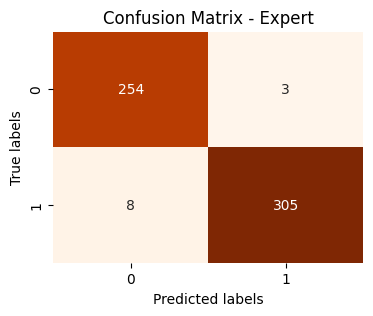

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_expert1, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Expert')
plt.show()

In [ ]:
RF2.fit(X_train_urine, y_train_urine)

RandomForestClassifier(random_state=42)

In [ ]:
pred_urine = RF2.predict(X_test_urine)

In [ ]:
conf_matrix_urine1 = confusion_matrix(y_test_urine, pred_urine)
accuracy_urine1 = accuracy_score(y_test_urine, pred_urine)
precision_urine1 = precision_score(y_test_urine, pred_urine)
recall_urine1 = recall_score(y_test_urine, pred_urine)
f1_urine1 = f1_score(y_test_urine, pred_urine)

In [ ]:
print("Urine Cytology:")
print("Accuracy:", accuracy_urine1)
print("Precision:", precision_urine1)
print("Recall:", recall_urine1)
print("F1 Score:", f1_urine1)
print("\n")

Urine Cytology:
Accuracy: 0.9631578947368421
Precision: 0.6666666666666666
Recall: 0.5
F1 Score: 0.5714285714285715




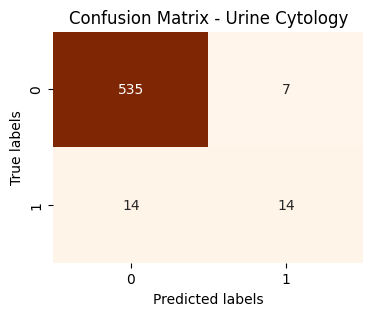

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_urine1, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Urine Cytology')
plt.show()

In [ ]:
RF3.fit(X_train_cystoscopy, y_train_cystoscopy)

RandomForestClassifier(random_state=42)

In [ ]:
pred_cystoscopy = RF3.predict(X_test_cystoscopy)

In [ ]:
conf_matrix_cystoscopy1 = confusion_matrix(y_test_cystoscopy, pred_cystoscopy)
accuracy_cystoscopy1 = accuracy_score(y_test_cystoscopy, pred_cystoscopy)
precision_cystoscopy1 = precision_score(y_test_cystoscopy, pred_cystoscopy)
recall_cystoscopy1 = recall_score(y_test_cystoscopy, pred_cystoscopy)
f1_cystoscopy1 = f1_score(y_test_cystoscopy, pred_cystoscopy)

In [ ]:
print("Cystoscopy:")
print("Accuracy:", accuracy_cystoscopy1)
print("Precision:", precision_cystoscopy1)
print("Recall:", recall_cystoscopy1)
print("F1 Score:", f1_cystoscopy1)

Cystoscopy:
Accuracy: 0.9508771929824561
Precision: 0.9513677811550152
Recall: 0.963076923076923
F1 Score: 0.9571865443425076


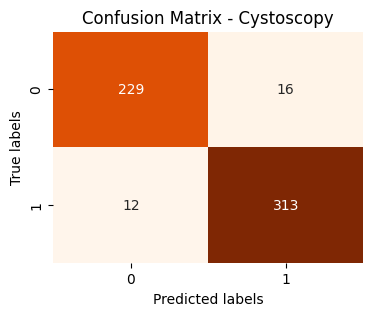

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_cystoscopy1, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Cystoscopy')
plt.show()

## **MLP**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the number of input features
input_shape = X_train.shape[1]

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create separate models for each target variable
model_expert = Sequential()
model_expert.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model_expert.add(Dropout(0.2))
model_expert.add(Dense(32, activation='relu'))
model_expert.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
model_expert.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_urine_cytology = Sequential()
model_urine_cytology.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model_urine_cytology.add(Dropout(0.2))
model_urine_cytology.add(Dense(32, activation='relu'))
model_urine_cytology.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
model_urine_cytology.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_cystoscopy = Sequential()
model_cystoscopy.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model_cystoscopy.add(Dropout(0.2))
model_cystoscopy.add(Dense(32, activation='relu'))
model_cystoscopy.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
model_cystoscopy.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summaries
print("Model for Expert:")
model_expert.summary()
print("\nModel for Urine Cytology:")
model_urine_cytology.summary()
print("\nModel for Cystoscopy:")
model_cystoscopy.summary()

NameError: name 'X_train' is not defined

In [ ]:
# Train the model for Expert
history_expert = model_expert.fit(X_train_expert, y_train_expert, epochs=50, batch_size=32, validation_data=(X_test_expert, y_test_expert), callbacks=[early_stopping])

# Train the model for Urine Cytology
history_urine_cytology = model_urine_cytology.fit(X_train_urine, y_train_urine, epochs=50, batch_size=32, validation_data=(X_test_urine, y_test_urine), callbacks=[early_stopping])

# Train the model for Cystoscopy
history_cystoscopy = model_cystoscopy.fit(X_train_cystoscopy, y_train_cystoscopy, epochs=50, batch_size=32, validation_data=(X_test_cystoscopy, y_test_cystoscopy), callbacks=[early_stopping])

Epoch 1/50
27/27 [==============================] - 1s 11ms/step - loss: 0.4491 - accuracy: 0.8970 - val_loss: 0.2430 - val_accuracy: 0.9789
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.9590 - val_loss: 0.1346 - val_accuracy: 0.9789
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.1698 - accuracy: 0.9590 - val_loss: 0.1119 - val_accuracy: 0.9789
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 0.9590 - val_loss: 0.1073 - val_accuracy: 0.9789
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9590 - val_loss: 0.1065 - val_accuracy: 0.9789
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9590 - val_loss: 0.1049 - val_accuracy: 0.9789
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9590 - val_loss: 0.1039 - val_accuracy: 0.9789
Epoch 8/50
27/27 [=

## **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Adam

# Function to build the LSTM model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

# Dictionary to store models and histories
models = {}
histories = {}

# Define validation split ratio (e.g., 20%)
val_split = 0.2

# Train each model separately
for target, (X_train, y_train) in zip(['Expert', 'UrineCytology', 'Cystoscopy'],
                                       [(X_train_expert, y_train_expert),
                                        (X_train_urine, y_train_urine),
                                        (X_train_cystoscopy, y_train_cystoscopy)]):

    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_split, random_state=42)

    # Build the model
    model = build_model(input_shape=(X_train.shape[1], 1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, batch_size=1, epochs=50,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Store the model and history
    models[target] = model
    histories[target] = history

Epoch 1/50
683/683 [==============================] - 9s 7ms/step - loss: 0.0684 - val_loss: 0.0583
Epoch 2/50
683/683 [==============================] - 2s 3ms/step - loss: 0.0497 - val_loss: 0.0531
Epoch 3/50
683/683 [==============================] - 2s 3ms/step - loss: 0.0490 - val_loss: 0.0526
Epoch 4/50
683/683 [==============================] - 2s 3ms/step - loss: 0.0494 - val_loss: 0.0587
Epoch 5/50
683/683 [==============================] - 2s 3ms/step - loss: 0.0492 - val_loss: 0.0536
Epoch 6/50
683/683 [==============================] - 3s 4ms/step - loss: 0.0485 - val_loss: 0.0532
Epoch 7/50
683/683 [==============================] - 2s 2ms/step - loss: 0.0483 - val_loss: 0.0534
Epoch 1/50
683/683 [==============================] - 5s 3ms/step - loss: 0.0564 - val_loss: 0.0678
Epoch 2/50
683/683 [==============================] - 3s 4ms/step - loss: 0.0500 - val_loss: 0.0725
Epoch 3/50
683/683 [==============================] - 2s 3ms/step - loss: 0.0477 - val_loss: 0.0669


# **Ensembe Learning**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize voting classifiers with base models for each target
voting_clf_cystoscopy = VotingClassifier(estimators=[('nb', nb_model_target1), ('rf', rf_model_target1), ('mlp', mlp_model_target1), ('lstm', rf_model_target1)], voting='hard')
voting_clf_expert = VotingClassifier(estimators=[('nb', nb_model_target2), ('rf', rf_model_target2), ('mlp', mlp_model_target2), ('lstm', rf_model_target2)], voting='hard')
voting_clf_urine = VotingClassifier(estimators=[('nb', nb_model_target3), ('rf', rf_model_target3), ('mlp', mlp_model_target3), ('lstm', rf_model_target3)], voting='hard')

# Train voting classifiers for each target
voting_clf_cystoscopy.fit(X_train_cystoscopy, y_train_cystoscopy)
voting_clf_expert.fit(X_train_expert, y_train_expert)
voting_clf_urine.fit(X_train_urine, y_train_urine)

# Make predictions for each target
predictions_cystoscopy = voting_clf_cystoscopy.predict(X_test_cystoscopy)
predictions_expert = voting_clf_expert.predict(X_test_expert)
predictions_urine = voting_clf_urine.predict(X_test_urine)

# Evaluate performance for each target
accuracy_cystoscopy = accuracy_score(y_test_target1, predictions_cystoscopy)
accuracy_expert = accuracy_score(y_test_expert, predictions_expert)
accuracy_urine = accuracy_score(y_test_urine, predictions_urine)

print("Accuracy of the ensemble model for target 1 (hard voting):", accuracy_cystoscopy)
print("Accuracy of the ensemble model for target 2 (hard voting):", accuracy_expert)
print("Accuracy of the ensemble model for target 3 (hard voting):", accuracy_urine)

In [ ]:
final_predictions = []
for i in range(len(X_test)):
    # Voting mechanism: Take the majority prediction among the three targets
    prediction = max(set([predictions_target1[i], predictions_target2[i], predictions_target3[i]]), key = [predictions_target1[i], predictions_target2[i], predictions_target3[i]].count)
    final_predictions.append(prediction)

#**Recommendation System**

In [ ]:
RF3.fit(X_train_cystoscopy,y_train_cystoscopy)
pred1 = RF3.predict(X_test_cystoscopy)
accuracy_score(y_test_cystoscopy, pred1)

0.9508771929824561

In [ ]:
RF1.fit(X_train_expert,y_train_expert)
pred2 = RF1.predict(X_test_expert)
accuracy_score(y_test_expert, pred2)

0.980701754385965

In [ ]:
RF2.fit(X_train_urine,y_train_urine)
pred1 = RF2.predict(X_test_urine)
accuracy_score(y_test_urine, pred1)

0.9631578947368421

In [ ]:
import pickle
pickle.dump(RF1, open('RF1.pkl','wb'))

In [ ]:
RF1 = pickle.load(open('RF1.pkl','rb'))

In [ ]:
import pickle
pickle.dump(RF2, open('RF2.pkl','wb'))

In [ ]:
RF2 = pickle.load(open('RF2.pkl','rb'))

In [ ]:
import pickle
pickle.dump(RF3, open('RF3.pkl','wb'))

In [ ]:
RF3 = pickle.load(open('RF3.pkl','rb'))

In [ ]:
print("Predicted:", RF.predict(X_test_urine[[10]].reshape(1, -1)))
print("Actual:", y_test_urine[10])

Predicted: [0]
Actual: 0


In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[('RF1', RF1), ('RF2', RF2), ('RF3', RF3)], voting='hard')

# Fit the ensemble model
ensemble_classifier.fit(X_train_expert, y_train_expert)


VotingClassifier(estimators=[('RF1', RandomForestClassifier(random_state=42)),
                             ('RF2', RandomForestClassifier(random_state=42)),
                             ('RF3', RandomForestClassifier(random_state=42))])

In [ ]:
ensemble_classifier_predictions = ensemble_classifier.predict(X_test_expert)

In [ ]:
accuracy = accuracy_score(y_test_expert, ensemble_classifier_predictions)
print("Ensemble Classifier Accuracy:", accuracy)

Ensemble Classifier Accuracy: 0.980701754385965


In [ ]:

# Obtain predictions from all three models for new patient symptoms
predictions_RF1 = RF1.predict_proba(new_patient_data)
predictions_RF2 = RF2.predict_proba(new_patient_data)
predictions_RF3 = RF3.predict_proba(new_patient_data)

# Combine predictions into a matrix
all_predictions = np.vstack((predictions_RF1, predictions_RF2, predictions_RF3))

# Select recommendation based on the maximum probability across all models
final_recommendation_index = np.argmax(np.max(all_predictions, axis=0))
final_recommendation = final_recommendation_index + 1
diagnostic_methods = ['GeneExpert', 'UrineCytology', 'Cystoscopy']

recommended_method = diagnostic_methods[final_recommendation_index]

print("Recommended Diagnostic Method:", recommended_method)
